In [125]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import math
import numpy as np
import tensorflow as tf

In [126]:
csv_file = './data/palmerpenguins_original.csv'
data = pd.read_csv(csv_file)

dataset = data.loc[:, ['species', 'sex', 'bill_length_mm', 'body_mass_g']]
dataset = dataset.dropna()
dataset

,species,sex,bill_length_mm,body_mass_g
0,Adelie,male,39.1,3750.0
1,Adelie,female,39.5,3800.0
2,Adelie,female,40.3,3250.0
4,Adelie,female,36.7,3450.0
5,Adelie,male,39.3,3650.0
...,...,...,...,...
339,Chinstrap,male,55.8,4000.0
340,Chinstrap,female,43.5,3400.0
341,Chinstrap,male,49.6,3775.0
342,Chinstrap,male,50.8,4100.0


In [127]:
def get_specimen_index(sp: str) -> int:
    species = dataset['species'].unique()

    for i in range(len(species)):
        specimen = species[i]

        if specimen.lower() == sp.lower():
            return i
        
    return 0

dataset['species_category'] = [get_specimen_index(sp) for sp in dataset['species']]
dataset['is_male'] = [1 if sex == 'male' else 0 for sex in dataset['sex']]

dataset = dataset.drop(columns=['species', 'sex'])
dataset


,bill_length_mm,body_mass_g,species_category,is_male
0,39.1,3750.0,0,1
1,39.5,3800.0,0,0
2,40.3,3250.0,0,0
4,36.7,3450.0,0,0
5,39.3,3650.0,0,1
...,...,...,...,...
339,55.8,4000.0,2,1
340,43.5,3400.0,2,0
341,49.6,3775.0,2,1
342,50.8,4100.0,2,1


In [128]:
X = dataset.loc[:, ['bill_length_mm', 'is_male', 'species_category']]
Y = dataset['body_mass_g']

In [129]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

# Scale the target variable too
y_scaler = StandardScaler()
Y_scaled = y_scaler.fit_transform(Y.values.reshape(-1, 1))

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

In [131]:
def draw_training_graph(train_loss, val_loss):
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, 'o-', color='green', label='Training Loss')
    plt.plot(val_loss, 'o-', color='red', label='Validation Loss')
    plt.title('Model Mean Squared Error')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def calc_mse(model):
    y_pred_scaled = model.predict(x_test)

    y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
    y_test_original = y_scaler.inverse_transform(y_test)

    mse_original = mean_squared_error(y_test_original, y_pred_original)

    return mse_original

# Models 
- Base Model: Perceptron
- Model 4: 4x16
- Model 2: 3x16
- Model 3: 2x16

For the Network I chose the ReLU activation function because:

-   Lower computational cost
-	Simple derivative (1 when input > 0, 0 otherwise)
-	Prevents negative outputs (Negative penguin weights)

I also read that sigmoid is mostly used for classification, and the Swish activation function will only really make a difference in a more complex network.

#### Training parameters

I searched up an what an ideal learning rate would be and i found out on multiple websites that the learning rate is mostly 0.001 to 0.1. And i chose to use the same settings as with part 2 of this asigment.

In [132]:
tf.config.run_functions_eagerly(True)

epochs = 100
learning_rate = 0.001
validation_split = 0.11


def get_optimizer():
    return tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Perceptron

In [133]:
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=3, activation='relu'))
perceptron.compile(loss='mse', optimizer=get_optimizer())

perceptron_history = perceptron.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4993

c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3907 - val_loss: 2.2632
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9892 - val_loss: 2.2385
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9998 - val_loss: 2.2143
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9521 - val_loss: 2.1905
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.0578 - val_loss: 2.1675
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.0669 - val_loss: 2.1455
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8299 - val_loss: 2.1250
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.0063 - val_loss: 2.1038
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8796 - val_loss: 2.0832
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7379 - val_loss: 2.0641
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9369 - val_loss: 2.0448
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8879 - val_loss: 2.0254
E

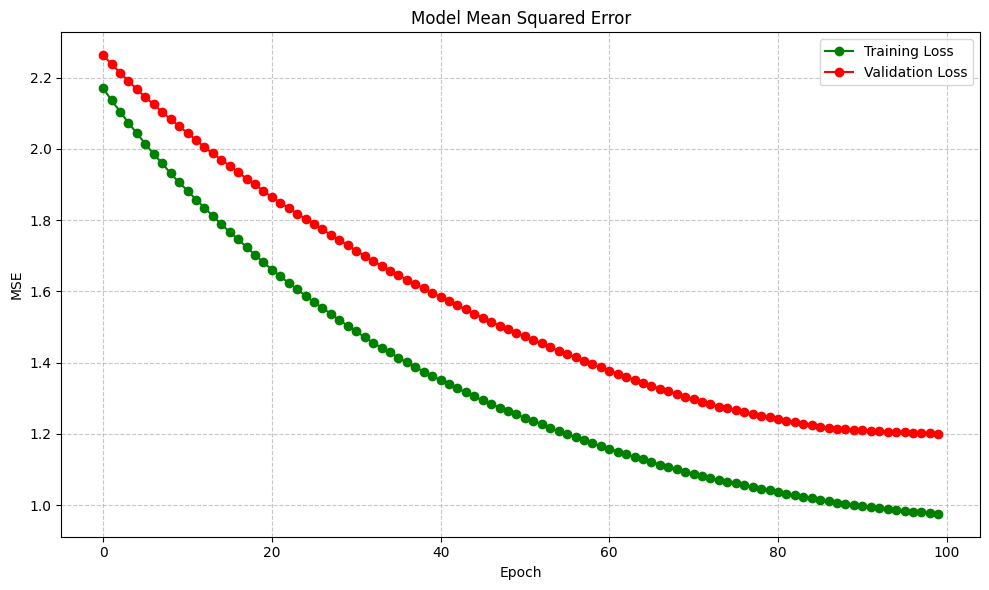

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 558981.69 grams²
Root Mean Squared Error (MSE): 747.65 grams²


c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [134]:
draw_training_graph(perceptron_history.history['loss'], perceptron_history.history['val_loss'])
perceptron_mse = calc_mse(perceptron)
perceptron_mse_root = math.sqrt(perceptron_mse)

print(f"Mean Squared Error (MSE): {perceptron_mse:.2f} grams²")
print(f"Root Mean Squared Error (MSE): {perceptron_mse_root:.2f} grams²")


## Model 1

In [135]:
m1 = Sequential()
m1.add(Dense(16, input_dim=3, activation='relu'))
m1.add(Dense(16, activation='relu'))
m1.add(Dense(16, activation='relu'))
m1.add(Dense(16, activation='relu'))
m1.add(Dense(1))

m1.compile(loss='mse', optimizer=get_optimizer())

m1_history = m1.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100


c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.4364 - val_loss: 1.8044
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1410 - val_loss: 1.4036
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9458 - val_loss: 1.1330
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8481 - val_loss: 0.9408
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6856 - val_loss: 0.7805
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6277 - val_loss: 0.6480
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4830 - val_loss: 0.5345
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4262 - val_loss: 0.4409
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4326 - val_loss: 0.3720
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3161 - val_loss: 0.3101
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2604 - val_loss: 0.2645
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2469 - val_loss: 0.2261
E

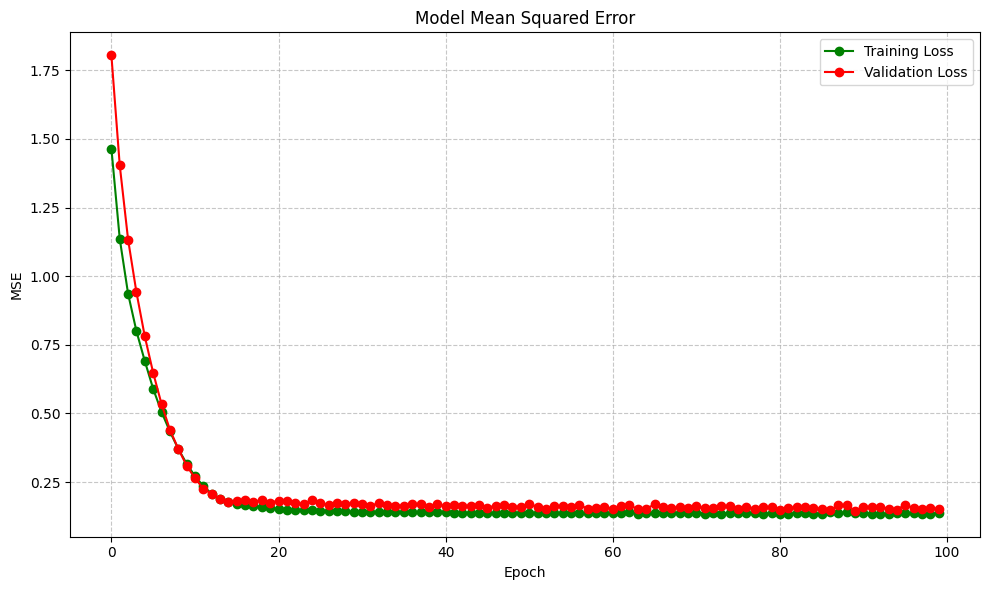

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 76926.42 grams²
Root Mean Squared Error (MSE): 277.36 grams²


In [136]:
draw_training_graph(m1_history.history['loss'], m1_history.history['val_loss'])
m1_mse = calc_mse(m1)
m1_mse_root = math.sqrt(m1_mse)

print(f"Mean Squared Error (MSE): {m1_mse:.2f} grams²")
print(f"Root Mean Squared Error (MSE): {m1_mse_root:.2f} grams²")


## Model 2

In [137]:
m2 = Sequential()
m2.add(Dense(16, input_dim=3, activation='relu'))
m2.add(Dense(16, activation='relu'))
m2.add(Dense(16, activation='relu'))
m2.add(Dense(1))

m2.compile(loss='mse', optimizer=get_optimizer())

m2_history = m2.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0787

c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1185 - val_loss: 1.4168
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0157 - val_loss: 1.2693
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9154 - val_loss: 1.1398
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9002 - val_loss: 1.0273
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8480 - val_loss: 0.9231
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6439 - val_loss: 0.8194
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6547 - val_loss: 0.7237
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6108 - val_loss: 0.6414
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5324 - val_loss: 0.5666
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4361 - val_loss: 0.5022
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4085 - val_loss: 0.4545
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3572 - val_loss: 0.4142
E

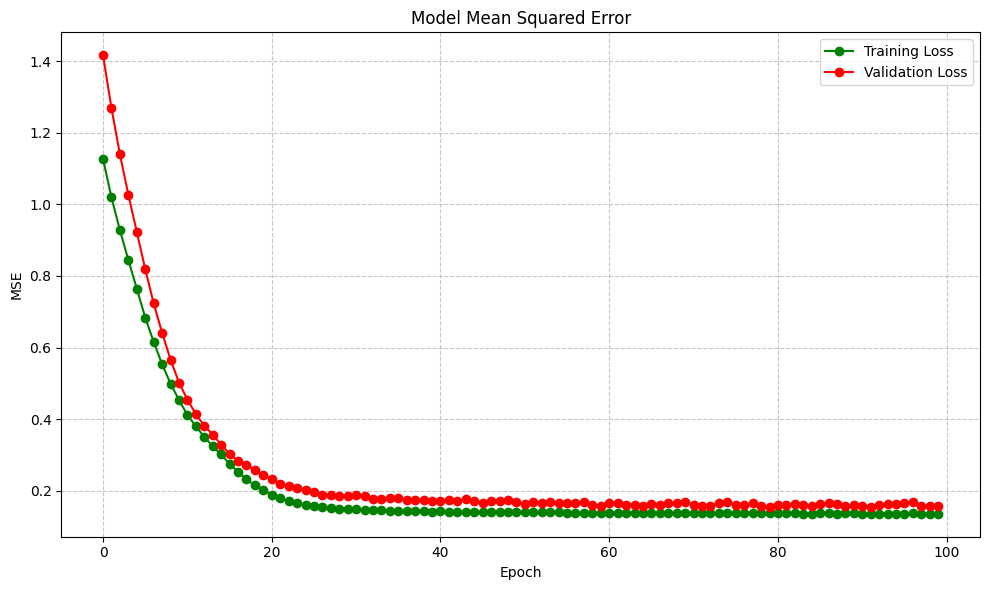

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (MSE): 76926.42 grams²
Root Mean Squared Error (MSE): 276.42 grams²


In [138]:
draw_training_graph(m2_history.history['loss'], m2_history.history['val_loss'])
m2_mse = calc_mse(m2)
m2_mse_root = math.sqrt(m2_mse)

print(f"Mean Squared Error (MSE): {m1_mse:.2f} grams²")
print(f"Root Mean Squared Error (MSE): {m2_mse_root:.2f} grams²")


## Model 3

In [139]:
m3 = Sequential()
m3.add(Dense(16, input_dim=3, activation='relu'))
m3.add(Dense(16, activation='relu'))
m3.add(Dense(1))

m3.compile(loss='mse', optimizer=get_optimizer())

m3_history = m3.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100
4/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.4392

c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-vMUDey0t-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.3347 - val_loss: 0.9835
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1012 - val_loss: 0.8816
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0599 - val_loss: 0.8119
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8105 - val_loss: 0.7657
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7989 - val_loss: 0.7325
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7485 - val_loss: 0.7074
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6038 - val_loss: 0.6898
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6914 - val_loss: 0.6694
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5568 - val_loss: 0.6467
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5674 - val_loss: 0.6242
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5172 - val_loss: 0.5976
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5490 - val_loss: 0.5677
E

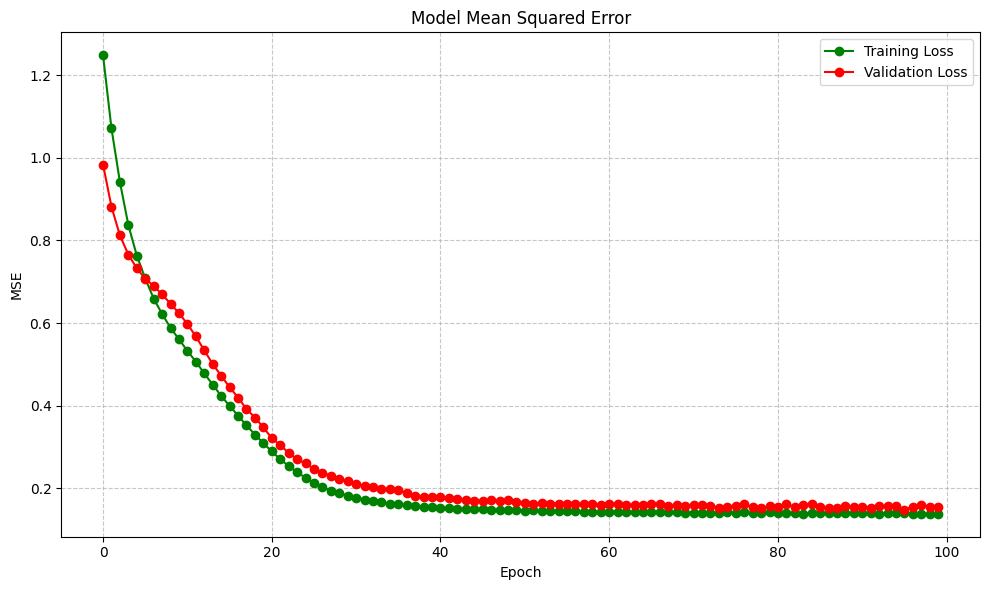

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 80173.98 grams²
Root Mean Squared Error (MSE): 283.15 grams²


In [140]:
draw_training_graph(m3_history.history['loss'], m3_history.history['val_loss'])
m3_mse = calc_mse(m3)
m3_mse_root = math.sqrt(m3_mse)

print(f"Mean Squared Error (MSE): {m3_mse:.2f} grams²")
print(f"Root Mean Squared Error (MSE): {m3_mse_root:.2f} grams²")


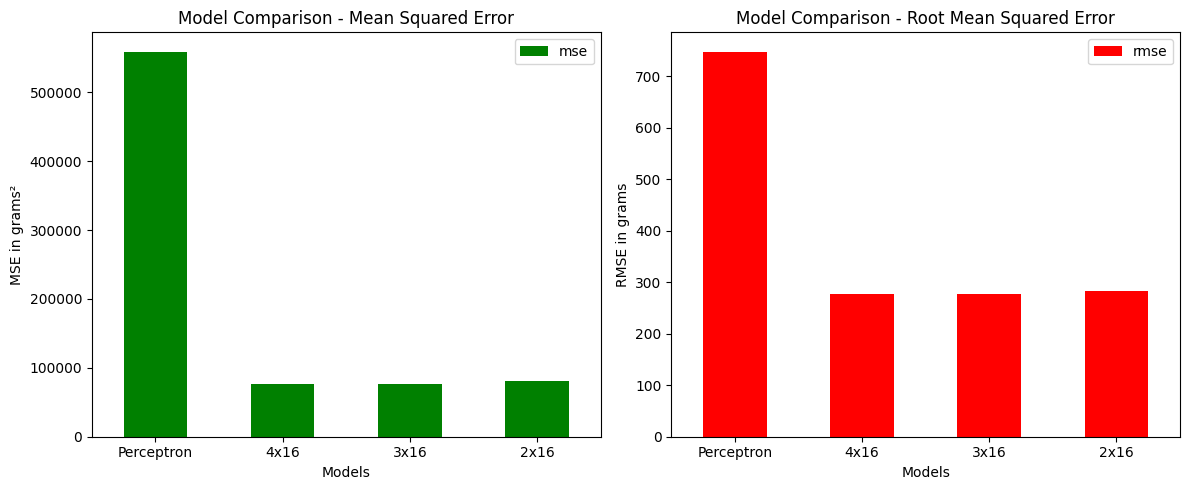

In [ ]:


mf = pd.DataFrame({
    'models': ['Perceptron', '4x16', '3x16', '2x16'],
    'mse': [perceptron_mse, m1_mse, m2_mse, m3_mse]
})

mf['rmse'] = np.sqrt(mf['mse'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
mf.plot.bar(x='models', y='mse', rot=0, ax=ax1, color='green')
ax1.set_title('Model Comparison - Mean Squared Error')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE in grams²')

mf.plot.bar(x='models', y='rmse', rot=0, ax=ax2, color='red')
ax2.set_title('Model Comparison - Root Mean Squared Error')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE in grams')

plt.tight_layout()
plt.show()

In the graph above can be seen that the complexity of the model decreases the MSE or RMSE dramaticly but adding one extra layer of neurons did not really matter.

In [142]:
avg_weight = np.average(dataset['body_mass_g'])
avg_rmse = np.average(mf['rmse'])

error_percentage = float(avg_rmse / avg_weight * 100)
error_percentage

9.41615884997337

Here you can see that the avarage accuracy of each model is about 90% accurate. So we can indeed conclude the flipper length species and bill length are good independend values to predict the body mass.